<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


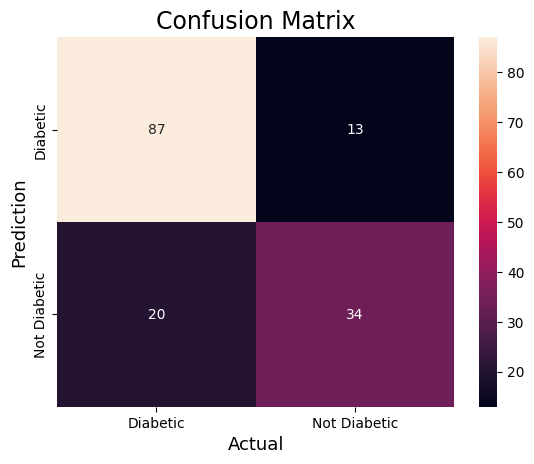

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# load the digit dataset
diabdata = pd.read_csv("diabetes.csv")

# defining feature matrix(X) and response vector(y)
xdata = diabdata.drop(columns=['Outcome'])
ydata = diabdata['Outcome']

diabdata.info()
diabdata.describe()

# splitting X and y into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2, random_state=5)

# create logistic regression object
linreg = linear_model.LogisticRegression()

# train the model using the training sets
linreg.fit(xtrain, ytrain)

# making predictions on the testing set
ypred = linreg.predict(xtest)

# comparing actual response values (ytest)
# with predicted response values (ypred)

print()
print(classification_report(ytest, ypred))
print()

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy*100)

# Calculate precision
precision = precision_score(ytest, ypred)
print("Precision:", precision*100)

# Calculate recall (sensitivity)
recall = recall_score(ytest, ypred)
print("Recall (Sensitivity):", recall*100)

# Calculate F1-score
f1 = f1_score(ytest, ypred)
print("F1-Score:", f1*100)

cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Diabetic','Not Diabetic'], yticklabels=['Diabetic','Not Diabetic'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
